20220920
Multilayer perceptron을 이용한 예측
- origin

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os

import torch
print(torch.cuda.is_available())
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # Arrange GPU devices starting from 0
os.environ["CUDA_VISIBLE_DEVICES"]= "0, 1, 2, 3"  # Set the GPUs 2 and 3 to use

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device:', device)
print('Current cuda device:', torch.cuda.current_device())
print('Count of using GPUs:', torch.cuda.device_count())

import matplotlib.pyplot as plt

True
Device: cuda
Current cuda device: 0
Count of using GPUs: 4


In [10]:
%matplotlib inline

df = pd.read_csv('../data_up_delta.csv')
df.head()

,Unnamed: 0,receve comp time,printing start time,printing comp time,cutting start time,cutting comp time,pac time,T1,T2,T3,...,T5,X1,X2,X3,X4,Y0,X1_d1,X3_d1,X1_d2,X3_d2
0,2,2020-12-08 08:10:00,2020-12-08 08:10:00,2020-12-08 10:30:00,2020-12-08 10:35:00,2020-12-08 11:45:00,2020-12-08 17:10:00,0 days 02:20:00,0 days 00:05:00,0 days 01:10:00,...,0 days 09:00:00,140.0,5.0,70.0,325.0,540.0,140.0,70.0,140.0,70.0
1,3,2020-12-08 08:10:00,2020-12-08 08:10:00,2020-12-08 10:30:00,2020-12-08 10:35:00,2020-12-08 11:45:00,2020-12-08 17:10:00,0 days 02:20:00,0 days 00:05:00,0 days 01:10:00,...,0 days 09:00:00,140.0,5.0,70.0,325.0,540.0,140.0,70.0,140.0,70.0
2,4,2020-12-08 08:10:00,2020-12-08 08:10:00,2020-12-08 10:30:00,2020-12-08 10:35:00,2020-12-08 11:45:00,2020-12-08 17:10:00,0 days 02:20:00,0 days 00:05:00,0 days 01:10:00,...,0 days 09:00:00,140.0,5.0,70.0,325.0,540.0,140.0,70.0,140.0,70.0
3,5,2020-12-08 08:10:00,2020-12-08 08:10:00,2020-12-08 10:30:00,2020-12-08 10:35:00,2020-12-08 11:45:00,2020-12-08 17:10:00,0 days 02:20:00,0 days 00:05:00,0 days 01:10:00,...,0 days 09:00:00,140.0,5.0,70.0,325.0,540.0,140.0,70.0,140.0,70.0
4,6,2020-12-08 08:10:00,2020-12-08 08:10:00,2020-12-08 10:30:00,2020-12-08 10:35:00,2020-12-08 11:45:00,2020-12-08 17:10:00,0 days 02:20:00,0 days 00:05:00,0 days 01:10:00,...,0 days 09:00:00,140.0,5.0,70.0,325.0,540.0,140.0,70.0,140.0,70.0


In [11]:
input_data = pd.DataFrame()
input_data[['receve comp time', 'X1','X2','X3', 'X4', 'X1_d1', 'X3_d1','Y0']] = df[['receve comp time', 'X1','X2','X3', 'X4', 'X1_d1', 'X3_d1', 'Y0']]
input_data.head(5)

,receve comp time,X1,X2,X3,X4,X1_d1,X3_d1,Y0
0,2020-12-08 08:10:00,140.0,5.0,70.0,325.0,140.0,70.0,540.0
1,2020-12-08 08:10:00,140.0,5.0,70.0,325.0,140.0,70.0,540.0
2,2020-12-08 08:10:00,140.0,5.0,70.0,325.0,140.0,70.0,540.0
3,2020-12-08 08:10:00,140.0,5.0,70.0,325.0,140.0,70.0,540.0
4,2020-12-08 08:10:00,140.0,5.0,70.0,325.0,140.0,70.0,540.0


In [12]:
# 데이터 프레임.info() 함수는 데이터프레임에 관한 정보
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16992 entries, 0 to 16991
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   receve comp time  16992 non-null  object 
 1   X1                16992 non-null  float64
 2   X2                16992 non-null  float64
 3   X3                16992 non-null  float64
 4   X4                16992 non-null  float64
 5   X1_d1             16992 non-null  float64
 6   X3_d1             16992 non-null  float64
 7   Y0                16992 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.0+ MB


In [147]:
x3_pre = pd.DataFrame()
x3_pre[['X3_pre']] = input_data[['X3']]
x3_pre.head(5)

,X3_pre
0,70.0
1,70.0
2,70.0
3,70.0
4,70.0


In [148]:
x3_pre.shape

(16992, 1)

In [149]:
x3_push = pd.DataFrame()
x3_push[['X3_pre']] = x3_pre.iloc[:1]
x3_push

,X3_pre
0,70.0


In [150]:
x3_push = x3_push.append(x3_pre)
x3_push

,X3_pre
0,70.0
0,70.0
1,70.0
2,70.0
3,70.0
...,...
16987,63.0
16988,177.0
16989,63.0
16990,63.0


In [151]:
x3_push = x3_push.iloc[:-1]
x3_push

,X3_pre
0,70.0
0,70.0
1,70.0
2,70.0
3,70.0
...,...
16986,25.0
16987,63.0
16988,177.0
16989,63.0


In [152]:
x3_push = x3_push['X3_pre'].to_numpy()
x3_push

array([ 70.,  70.,  70., ..., 177.,  63.,  63.])

### x3 이전 값

In [154]:
x3_pre = pd.DataFrame()
x3_pre[['X3_pre']] = input_data[['X3']]
x3_push = pd.DataFrame()
x3_push[['X3_pre']] = x3_pre.iloc[:1]
x3_push = x3_push.append(x3_pre)
x3_push = x3_push.iloc[:-1]
x3_push = x3_push['X3_pre'].to_numpy()
x3_push

array([ 70.,  70.,  70., ..., 177.,  63.,  63.])

X1, X2, X3, X4 의 평균 구하기 추정할 때, 값이 없을 경우 평균으로 입력

In [13]:
X1_mean = df['X1'].mean()
X2_mean = df['X2'].mean()
X3_mean = df['X3'].mean()
X4_mean = df['X4'].mean()
Y0_mean = df['Y0'].mean()

X1_d1_mean = df['X1_d1'].mean()
X3_d1_mean = df['X3_d1'].mean()
print('X1 mean={:.2f}, X2 mean={:.2f}, X3 mean={:.2f}, X4 mean={:.2f}'.format(X1_mean, X2_mean, X3_mean, X4_mean))
print('X1_d1 mean={:.2f}, X3_d1 mean={:.2f}'.format(X1_d1_mean, X3_d1_mean))

X1 mean=123.99, X2 mean=5.05, X3 mean=130.89, X4 mean=10.54
X1_d1 mean=123.99, X3_d1 mean=130.89


In [14]:
# 데이터 셋을 target 기준으로 분리. Y0가 예측하려고 하는 값, X1, X2, X3 입력 변수 값
X = df[['X1','X2','X3', 'X4', 'X1_d1', 'X3_d1']].values
y = df['Y0'].values
print(X.shape, type(X))
print(y.shape, type(y))

(16992, 6) <class 'numpy.ndarray'>
(16992,) <class 'numpy.ndarray'>


In [15]:
# 80% training, 20% test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(13593, 6) (13593,)
(3399, 6) (3399,)


### x3 이전값

In [173]:
x3_pre = pd.DataFrame(x_test)
x3_pre.columns = ['X1', 'X2', 'X3', 'X4', 'X1_d1', 'X3_d1']
x3_pre = x3_pre[['X3']]
x3_push = pd.DataFrame()
x3_push[['X3']] = x3_pre.iloc[:1]
x3_push = x3_push.append(x3_pre)
x3_push = x3_push.iloc[:-1]
x3_push = x3_push['X3'].to_numpy()
x3_push

array([  8.,   8.,  37., ..., 231.,   2., 134.])

데이터를 tensor 데이터형으로 변환

In [16]:
x_train_seq = torch.FloatTensor(x_train)
y_train_seq = torch.FloatTensor(y_train).view([-1, 1])
x_test_seq = torch.FloatTensor(x_test)
y_test_seq = torch.FloatTensor(y_test).view([-1, 1])
print(x_train_seq.size(), y_train_seq.size())
print(x_test_seq.size(), y_test_seq.size())

torch.Size([13593, 6]) torch.Size([13593, 1])
torch.Size([3399, 6]) torch.Size([3399, 1])


In [17]:
x_train_seq = x_train_seq.to(device)
y_train_seq = y_train_seq.to(device)
x_test_seq =  x_test_seq.to(device)
y_test_seq = y_test_seq.to(device)
print(x_train_seq.is_cuda)

True


data loader 만들기

In [18]:
# 배치 형태로 만들어 주자. 시계열이니까 셔플을 막 하면 안된다
train = torch.utils.data.TensorDataset(x_train_seq, y_train_seq)  # x_train 과 y_train 은 하나의 TensorDataset 으로 결합
test = torch.utils.data.TensorDataset(x_test_seq, y_test_seq)

batch_size = 50
train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

In [19]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import  TensorDataset, DataLoader

모델 만들기

In [20]:
relu = nn.ReLU()
linear1 = nn.Linear(6, 64, bias=True)
linear2 = nn.Linear(64, 512, bias=True)
linear3 = nn.Linear(512, 1024, bias=True)
linear33 = nn.Linear(1024, 2048, bias=True)
linear4 = nn.Linear(2048, 512, bias=True)
linear5 = nn.Linear(512, 32, bias=True)
linear6 = nn.Linear(32, 1, bias=True)

nn.init.xavier_uniform_(linear1.weight)
nn.init.xavier_uniform_(linear2.weight)
nn.init.xavier_uniform_(linear3.weight)
nn.init.xavier_uniform_(linear33.weight)
nn.init.xavier_uniform_(linear4.weight)
nn.init.xavier_uniform_(linear5.weight)
nn.init.xavier_uniform_(linear6.weight)

model = nn.Sequential(
    linear1, relu,
    linear2, relu,
    linear3, relu,
    linear33, relu,
    linear4, relu,
    linear5, relu,
    linear6
)

print(model)

Sequential(
  (0): Linear(in_features=6, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=1024, bias=True)
  (5): ReLU()
  (6): Linear(in_features=1024, out_features=2048, bias=True)
  (7): ReLU()
  (8): Linear(in_features=2048, out_features=512, bias=True)
  (9): ReLU()
  (10): Linear(in_features=512, out_features=32, bias=True)
  (11): ReLU()
  (12): Linear(in_features=32, out_features=1, bias=True)
)


In [21]:
model.to(device)

Sequential(
  (0): Linear(in_features=6, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=1024, bias=True)
  (5): ReLU()
  (6): Linear(in_features=1024, out_features=2048, bias=True)
  (7): ReLU()
  (8): Linear(in_features=2048, out_features=512, bias=True)
  (9): ReLU()
  (10): Linear(in_features=512, out_features=32, bias=True)
  (11): ReLU()
  (12): Linear(in_features=32, out_features=1, bias=True)
)

In [22]:
import time
import os
import datetime
import os
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


num_epochs = 1000
batch_size = 50
learning_r = 1e-3
pwd = os.getcwd()
print(pwd)
model_name = os.path.join(pwd,'model/mlp-data_up_delta2.model')
figure_name = os.path.join(pwd,'result/mlp-data_up_delta2.png')
print(model_name, figure_name)

def training(model, train_dataloader):
    print("\nTraining is Started ")
    model.train()
    criterion = nn.MSELoss()       
    optimizer = optim.Adam(model.parameters(), lr=learning_r)  

    start_time = time.time()
    loss_graph = [] # 그래프 그릴 목적인 loss.
    n = len(train_loader)

    for epoch in tqdm(range(num_epochs)):
        running_loss = 0.
        for data in train_loader:
            seq, target = data
            out = model(seq) 
            loss = criterion(out, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        loss_graph.append(running_loss / n)
        if epoch % 10 == 0:
            print('[epoch: {}] loss: {:.4f}   Time: {}'.format(epoch, running_loss/n, datetime.datetime.now()))
    plt.figure(figsize=(20,10))
    plt.plot(loss_graph)
    plt.show()
    plt.savefig(figure_name)

    torch.save(model.state_dict(), model_name)
    print('    model_path={} is saved'.format(model_name))
    return


/sharehouse/DATA/SMART_FACTORY/ckim
/sharehouse/DATA/SMART_FACTORY/ckim/model/mlp-data_up_delta2.model /sharehouse/DATA/SMART_FACTORY/ckim/result/mlp-data_up_delta2.png


In [23]:
# err_range = 10.  # error range in hit ratio
def testing(model, test_loader, err_range): # all values / Y0
    print("\nTesting is Started ")

    model.eval()
    model.load_state_dict(torch.load(model_name))
    print('model is loaded')

    with torch.no_grad():
        test_pred = []
        test_actual = []
        for data in test_loader:
          seq, target = data
          out = model(seq)
          test_pred += out.cpu().numpy().tolist()
          test_actual += target.cpu().numpy().tolist()
    print(len(test_pred), len(test_actual))
    print(test_pred[10:20])
    print(test_actual[10:20])
    
    mse = np.sqrt(mean_squared_error(test_pred, test_actual))
    print('평균제곱근오차', mse)
    r2 = r2_score(test_pred, test_actual)
    print('결정계수', r2)
    
    # hit ratio    
    test_pred = np.array(test_pred)
    test_actual = np.array(test_actual)
    diff = np.absolute(test_pred - test_actual)
    hit_int = [0 if i - err_range < 0 else 1 for i in diff]

    err_no = np.array(hit_int).sum()
    total_test = len(test_pred)
    err_rat = err_no / total_test
    hit_rat = 1.0 - err_rat
    print('hit ratio with error range({:.2f}) = {:.4f}, no of errors = {}, total = {}'.format(err_range, hit_rat, err_no, total_test))
   
    return

In [28]:
def testing2(model, test_loader, x2, x3, x4, x1_d1, x3_d1, err_range): # X1, All mean values / Y0
    print("\nTesting is Started ")

    model.eval()
    model.load_state_dict(torch.load(model_name))
    print('model is loaded')

    with torch.no_grad():
        test_pred = []
        test_actual = []
        for data in test_loader:
          seq, target = data
          seq[:,1] = x2
          seq[:,2] = x3
          seq[:,3] = x4
          seq[:,4] = x1_d1
          seq[:,5] = x3_d1
          out = model(seq)
          test_pred += out.cpu().numpy().tolist()
          test_actual += target.cpu().numpy().tolist()
    print(len(test_pred), len(test_actual))
    mse = np.sqrt(mean_squared_error(test_pred, test_actual))
    print('평균제곱근오차', mse)
    r2 = r2_score(test_pred, test_actual)
    print('결정계수', r2)
    
    # hit ratio    
    test_pred = np.array(test_pred)
    test_actual = np.array(test_actual)
    diff = np.absolute(test_pred - test_actual)
    hit_int = [0 if i - err_range < 0 else 1 for i in diff]

    err_no = np.array(hit_int).sum()
    total_test = len(test_pred)
    err_rat = err_no / total_test
    hit_rat = 1.0 - err_rat
    print('hit ratio with error range({:.2f}) = {:.4f}, no of errors = {}, total = {}'.format(err_range, hit_rat, err_no, total_test))
   
    return

In [131]:
def testing3(model, test_loader, x2, x3, x4, x1_d1, x3_d1, err_range): # X1, X2 mean, X3 previous value, X4 mean / Y0
    print("\nTesting is Started ")

    model.eval()
    model.load_state_dict(torch.load(model_name))
    print('model is loaded')

    with torch.no_grad():
        test_pred = []
        test_actual = []
        for data, x3_pre in zip(test_loader, x3):
          seq, target = data
          #print(seq)
          seq[:,1] = x2
          seq[:,2] = x3_pre
          seq[:,3] = x4
          #print('---> ', seq)
        
          out = model(seq)
          test_pred += out.cpu().numpy().tolist()
          test_actual += target.cpu().numpy().tolist()
            
          x3_pre = x3
    print(len(test_pred), len(test_actual))
    mse = np.sqrt(mean_squared_error(test_pred, test_actual))
    print('평균제곱근오차', mse)
    r2 = r2_score(test_pred, test_actual)
    print('결정계수', r2)
    
    # hit ratio    
    test_pred = np.array(test_pred)
    test_actual = np.array(test_actual)
    diff = np.absolute(test_pred - test_actual)
    hit_int = [0 if i - err_range < 0 else 1 for i in diff]

    err_no = np.array(hit_int).sum()
    total_test = len(test_pred)
    err_rat = err_no / total_test
    hit_rat = 1.0 - err_rat
    print('hit ratio with error range({:.2f}) = {:.4f}, no of errors = {}, total = {}'.format(err_range, hit_rat, err_no, total_test))
   
    return

  0%|          | 0/1000 [00:00<?, ?it/s]


Training is Started 


  0%|          | 1/1000 [00:02<35:14,  2.12s/it]

[epoch: 0] loss: 10480.8594   Time: 2022-09-20 18:02:55.195363


  1%|          | 11/1000 [00:18<26:21,  1.60s/it]

[epoch: 10] loss: 79.6033   Time: 2022-09-20 18:03:11.125443


  2%|▏         | 21/1000 [00:33<25:58,  1.59s/it]

[epoch: 20] loss: 338.9330   Time: 2022-09-20 18:03:27.032308


  3%|▎         | 31/1000 [00:49<25:43,  1.59s/it]

[epoch: 30] loss: 52.7481   Time: 2022-09-20 18:03:42.951191


  4%|▍         | 41/1000 [01:05<25:25,  1.59s/it]

[epoch: 40] loss: 659.5242   Time: 2022-09-20 18:03:58.866040


  5%|▌         | 51/1000 [01:21<25:09,  1.59s/it]

[epoch: 50] loss: 117.6657   Time: 2022-09-20 18:04:14.771699


  6%|▌         | 61/1000 [01:37<23:10,  1.48s/it]

[epoch: 60] loss: 7.9408   Time: 2022-09-20 18:04:30.170206


  7%|▋         | 71/1000 [01:49<19:10,  1.24s/it]

[epoch: 70] loss: 12.7142   Time: 2022-09-20 18:04:42.411949


  8%|▊         | 81/1000 [02:01<19:00,  1.24s/it]

[epoch: 80] loss: 153.9858   Time: 2022-09-20 18:04:54.803536


  9%|▉         | 91/1000 [02:14<18:55,  1.25s/it]

[epoch: 90] loss: 3.0808   Time: 2022-09-20 18:05:07.427667


 10%|█         | 101/1000 [02:26<18:41,  1.25s/it]

[epoch: 100] loss: 144.6875   Time: 2022-09-20 18:05:20.043649


 11%|█         | 111/1000 [02:39<18:25,  1.24s/it]

[epoch: 110] loss: 3.7191   Time: 2022-09-20 18:05:32.467903


 12%|█▏        | 121/1000 [02:51<18:08,  1.24s/it]

[epoch: 120] loss: 7.1335   Time: 2022-09-20 18:05:44.899254


 13%|█▎        | 131/1000 [03:04<17:53,  1.24s/it]

[epoch: 130] loss: 414.4065   Time: 2022-09-20 18:05:57.360719


 14%|█▍        | 141/1000 [03:16<17:38,  1.23s/it]

[epoch: 140] loss: 5.7693   Time: 2022-09-20 18:06:09.710847


 15%|█▌        | 151/1000 [03:28<17:24,  1.23s/it]

[epoch: 150] loss: 53.8702   Time: 2022-09-20 18:06:22.023606


 16%|█▌        | 161/1000 [03:41<17:11,  1.23s/it]

[epoch: 160] loss: 518.1032   Time: 2022-09-20 18:06:34.328380


 17%|█▋        | 171/1000 [03:53<16:59,  1.23s/it]

[epoch: 170] loss: 3.3509   Time: 2022-09-20 18:06:46.618148


 18%|█▊        | 181/1000 [04:05<16:49,  1.23s/it]

[epoch: 180] loss: 19.6738   Time: 2022-09-20 18:06:58.938839


 19%|█▉        | 191/1000 [04:18<16:36,  1.23s/it]

[epoch: 190] loss: 3.9255   Time: 2022-09-20 18:07:11.261698


 20%|██        | 201/1000 [04:30<16:22,  1.23s/it]

[epoch: 200] loss: 278.6756   Time: 2022-09-20 18:07:23.569421


 21%|██        | 211/1000 [04:42<16:06,  1.22s/it]

[epoch: 210] loss: 6.0872   Time: 2022-09-20 18:07:35.896530


 22%|██▏       | 221/1000 [04:55<15:53,  1.22s/it]

[epoch: 220] loss: 2.1868   Time: 2022-09-20 18:07:48.136322


 23%|██▎       | 231/1000 [05:07<15:52,  1.24s/it]

[epoch: 230] loss: 35.3223   Time: 2022-09-20 18:08:00.512816


 24%|██▍       | 241/1000 [05:19<15:32,  1.23s/it]

[epoch: 240] loss: 6.7070   Time: 2022-09-20 18:08:12.799549


 25%|██▌       | 251/1000 [05:31<15:20,  1.23s/it]

[epoch: 250] loss: 586.0263   Time: 2022-09-20 18:08:25.076149


 26%|██▌       | 261/1000 [05:44<15:06,  1.23s/it]

[epoch: 260] loss: 3.7043   Time: 2022-09-20 18:08:37.426465


 27%|██▋       | 271/1000 [05:56<14:59,  1.23s/it]

[epoch: 270] loss: 3.0334   Time: 2022-09-20 18:08:49.777418


 28%|██▊       | 281/1000 [06:09<15:12,  1.27s/it]

[epoch: 280] loss: 1.9021   Time: 2022-09-20 18:09:02.338031


 29%|██▉       | 291/1000 [06:21<14:37,  1.24s/it]

[epoch: 290] loss: 110.4684   Time: 2022-09-20 18:09:14.782650


 30%|███       | 301/1000 [06:34<14:23,  1.24s/it]

[epoch: 300] loss: 44.1177   Time: 2022-09-20 18:09:27.177201


 31%|███       | 311/1000 [06:46<14:11,  1.24s/it]

[epoch: 310] loss: 8.9849   Time: 2022-09-20 18:09:39.529126


 32%|███▏      | 321/1000 [06:58<13:57,  1.23s/it]

[epoch: 320] loss: 20.8950   Time: 2022-09-20 18:09:51.893697


 33%|███▎      | 331/1000 [07:11<13:43,  1.23s/it]

[epoch: 330] loss: 1.4371   Time: 2022-09-20 18:10:04.198799


 34%|███▍      | 341/1000 [07:23<13:32,  1.23s/it]

[epoch: 340] loss: 16.6559   Time: 2022-09-20 18:10:16.558680


 35%|███▌      | 351/1000 [07:35<13:20,  1.23s/it]

[epoch: 350] loss: 1.2225   Time: 2022-09-20 18:10:28.881296


 36%|███▌      | 361/1000 [07:48<13:31,  1.27s/it]

[epoch: 360] loss: 30.1797   Time: 2022-09-20 18:10:41.344485


 37%|███▋      | 371/1000 [08:00<12:55,  1.23s/it]

[epoch: 370] loss: 38.5720   Time: 2022-09-20 18:10:53.850754


 38%|███▊      | 381/1000 [08:13<12:41,  1.23s/it]

[epoch: 380] loss: 21.9374   Time: 2022-09-20 18:11:06.154461


 39%|███▉      | 391/1000 [08:25<13:09,  1.30s/it]

[epoch: 390] loss: 29.2886   Time: 2022-09-20 18:11:18.676515


 40%|████      | 401/1000 [08:38<12:49,  1.28s/it]

[epoch: 400] loss: 1.3573   Time: 2022-09-20 18:11:31.411070


 41%|████      | 411/1000 [08:50<12:07,  1.24s/it]

[epoch: 410] loss: 4.8942   Time: 2022-09-20 18:11:43.826493


 42%|████▏     | 421/1000 [09:03<11:56,  1.24s/it]

[epoch: 420] loss: 2.0167   Time: 2022-09-20 18:11:56.187277


 43%|████▎     | 431/1000 [09:15<11:54,  1.26s/it]

[epoch: 430] loss: 1.8838   Time: 2022-09-20 18:12:08.825482


 44%|████▍     | 441/1000 [09:28<11:28,  1.23s/it]

[epoch: 440] loss: 39.2660   Time: 2022-09-20 18:12:21.173260


 45%|████▌     | 451/1000 [09:40<11:30,  1.26s/it]

[epoch: 450] loss: 93.5257   Time: 2022-09-20 18:12:33.682066


 46%|████▌     | 461/1000 [09:52<11:06,  1.24s/it]

[epoch: 460] loss: 7.0820   Time: 2022-09-20 18:12:46.062817


 47%|████▋     | 471/1000 [10:05<11:11,  1.27s/it]

[epoch: 470] loss: 1.7906   Time: 2022-09-20 18:12:58.704182


 48%|████▊     | 481/1000 [10:18<10:57,  1.27s/it]

[epoch: 480] loss: 24.0256   Time: 2022-09-20 18:13:11.395421


 49%|████▉     | 491/1000 [10:31<11:35,  1.37s/it]

[epoch: 490] loss: 1.4625   Time: 2022-09-20 18:13:24.401892


 50%|█████     | 501/1000 [10:44<10:42,  1.29s/it]

[epoch: 500] loss: 8.5643   Time: 2022-09-20 18:13:37.300361


 51%|█████     | 511/1000 [10:55<10:03,  1.23s/it]

[epoch: 510] loss: 12.9310   Time: 2022-09-20 18:13:48.973052


 52%|█████▏    | 521/1000 [11:08<10:07,  1.27s/it]

[epoch: 520] loss: 12.1602   Time: 2022-09-20 18:14:01.620128


 53%|█████▎    | 531/1000 [11:21<10:56,  1.40s/it]

[epoch: 530] loss: 34.4103   Time: 2022-09-20 18:14:14.726559


 54%|█████▍    | 541/1000 [11:34<09:44,  1.27s/it]

[epoch: 540] loss: 7.6308   Time: 2022-09-20 18:14:27.409377


 55%|█████▌    | 551/1000 [11:46<09:27,  1.26s/it]

[epoch: 550] loss: 1.3367   Time: 2022-09-20 18:14:40.034674


 56%|█████▌    | 561/1000 [11:59<09:14,  1.26s/it]

[epoch: 560] loss: 1.9256   Time: 2022-09-20 18:14:52.651691


 57%|█████▋    | 571/1000 [12:12<09:06,  1.27s/it]

[epoch: 570] loss: 98.5725   Time: 2022-09-20 18:15:05.417901


 58%|█████▊    | 581/1000 [12:24<08:34,  1.23s/it]

[epoch: 580] loss: 25.8202   Time: 2022-09-20 18:15:17.859233


 59%|█████▉    | 591/1000 [12:37<08:20,  1.22s/it]

[epoch: 590] loss: 1.4171   Time: 2022-09-20 18:15:30.085716


 60%|██████    | 601/1000 [12:49<08:06,  1.22s/it]

[epoch: 600] loss: 45.1041   Time: 2022-09-20 18:15:42.298032


 61%|██████    | 611/1000 [13:01<07:54,  1.22s/it]

[epoch: 610] loss: 6.3703   Time: 2022-09-20 18:15:54.493540


 62%|██████▏   | 621/1000 [13:13<07:46,  1.23s/it]

[epoch: 620] loss: 4.3160   Time: 2022-09-20 18:16:06.812674


 63%|██████▎   | 631/1000 [13:26<07:33,  1.23s/it]

[epoch: 630] loss: 7.4970   Time: 2022-09-20 18:16:19.098604


 64%|██████▍   | 641/1000 [13:38<07:20,  1.23s/it]

[epoch: 640] loss: 6.9168   Time: 2022-09-20 18:16:31.383581


 65%|██████▌   | 651/1000 [13:50<07:08,  1.23s/it]

[epoch: 650] loss: 5.5101   Time: 2022-09-20 18:16:43.656340


 66%|██████▌   | 661/1000 [14:02<06:56,  1.23s/it]

[epoch: 660] loss: 1.3781   Time: 2022-09-20 18:16:55.938931


 67%|██████▋   | 671/1000 [14:15<06:46,  1.23s/it]

[epoch: 670] loss: 11.9270   Time: 2022-09-20 18:17:08.255376


 68%|██████▊   | 681/1000 [14:27<06:34,  1.24s/it]

[epoch: 680] loss: 12.7176   Time: 2022-09-20 18:17:20.607546


 69%|██████▉   | 691/1000 [14:39<06:21,  1.23s/it]

[epoch: 690] loss: 2.6132   Time: 2022-09-20 18:17:32.953491


 70%|███████   | 701/1000 [14:52<06:11,  1.24s/it]

[epoch: 700] loss: 1.2607   Time: 2022-09-20 18:17:45.344328


 71%|███████   | 711/1000 [15:04<05:58,  1.24s/it]

[epoch: 710] loss: 2.4322   Time: 2022-09-20 18:17:57.774289


 72%|███████▏  | 721/1000 [15:17<05:45,  1.24s/it]

[epoch: 720] loss: 1.4808   Time: 2022-09-20 18:18:10.163019


 73%|███████▎  | 731/1000 [15:29<05:33,  1.24s/it]

[epoch: 730] loss: 1.2360   Time: 2022-09-20 18:18:22.567204


 74%|███████▍  | 741/1000 [15:41<05:22,  1.24s/it]

[epoch: 740] loss: 1.7563   Time: 2022-09-20 18:18:34.994039


 75%|███████▌  | 751/1000 [15:54<05:09,  1.24s/it]

[epoch: 750] loss: 1.1482   Time: 2022-09-20 18:18:47.436560


 76%|███████▌  | 761/1000 [16:06<04:56,  1.24s/it]

[epoch: 760] loss: 16.9020   Time: 2022-09-20 18:18:59.850747


 77%|███████▋  | 771/1000 [16:19<04:44,  1.24s/it]

[epoch: 770] loss: 53.2793   Time: 2022-09-20 18:19:12.280631


 78%|███████▊  | 781/1000 [16:31<04:29,  1.23s/it]

[epoch: 780] loss: 25.3384   Time: 2022-09-20 18:19:24.618353


 79%|███████▉  | 791/1000 [16:43<04:17,  1.23s/it]

[epoch: 790] loss: 1.5534   Time: 2022-09-20 18:19:36.930720


 80%|████████  | 801/1000 [16:56<04:09,  1.26s/it]

[epoch: 800] loss: 24.6982   Time: 2022-09-20 18:19:49.452416


 81%|████████  | 811/1000 [17:08<03:53,  1.24s/it]

[epoch: 810] loss: 1.4858   Time: 2022-09-20 18:20:01.779262


 82%|████████▏ | 821/1000 [17:21<03:39,  1.23s/it]

[epoch: 820] loss: 4.4135   Time: 2022-09-20 18:20:14.083453


 83%|████████▎ | 831/1000 [17:33<03:28,  1.23s/it]

[epoch: 830] loss: 14.5302   Time: 2022-09-20 18:20:26.393647


 84%|████████▍ | 841/1000 [17:45<03:15,  1.23s/it]

[epoch: 840] loss: 9.7288   Time: 2022-09-20 18:20:38.698906


 85%|████████▌ | 851/1000 [17:57<03:02,  1.23s/it]

[epoch: 850] loss: 1.2771   Time: 2022-09-20 18:20:50.989703


 86%|████████▌ | 861/1000 [18:10<02:50,  1.23s/it]

[epoch: 860] loss: 5.6372   Time: 2022-09-20 18:21:03.294391


 87%|████████▋ | 871/1000 [18:22<02:38,  1.23s/it]

[epoch: 870] loss: 1.9679   Time: 2022-09-20 18:21:15.583655


 88%|████████▊ | 881/1000 [18:34<02:26,  1.23s/it]

[epoch: 880] loss: 18.0553   Time: 2022-09-20 18:21:27.874201


 89%|████████▉ | 891/1000 [18:47<02:13,  1.23s/it]

[epoch: 890] loss: 5.6850   Time: 2022-09-20 18:21:40.159161


 90%|█████████ | 901/1000 [18:59<02:01,  1.23s/it]

[epoch: 900] loss: 8.5638   Time: 2022-09-20 18:21:52.451307


 91%|█████████ | 911/1000 [19:11<01:49,  1.23s/it]

[epoch: 910] loss: 1.2519   Time: 2022-09-20 18:22:04.748986


 92%|█████████▏| 921/1000 [19:23<01:37,  1.23s/it]

[epoch: 920] loss: 56.2412   Time: 2022-09-20 18:22:17.044817


 93%|█████████▎| 931/1000 [19:36<01:26,  1.25s/it]

[epoch: 930] loss: 9.0750   Time: 2022-09-20 18:22:29.430210


 94%|█████████▍| 941/1000 [19:49<01:14,  1.27s/it]

[epoch: 940] loss: 1.7900   Time: 2022-09-20 18:22:42.167690


 95%|█████████▌| 951/1000 [20:01<01:00,  1.23s/it]

[epoch: 950] loss: 72.8076   Time: 2022-09-20 18:22:54.466719


 96%|█████████▌| 961/1000 [20:13<00:49,  1.28s/it]

[epoch: 960] loss: 7.4811   Time: 2022-09-20 18:23:07.018054


 97%|█████████▋| 971/1000 [20:26<00:35,  1.23s/it]

[epoch: 970] loss: 11.7562   Time: 2022-09-20 18:23:19.306433


 98%|█████████▊| 981/1000 [20:38<00:23,  1.23s/it]

[epoch: 980] loss: 4.3211   Time: 2022-09-20 18:23:31.613894


 99%|█████████▉| 991/1000 [20:50<00:11,  1.23s/it]

[epoch: 990] loss: 1.2676   Time: 2022-09-20 18:23:43.943374


100%|██████████| 1000/1000 [21:01<00:00,  1.26s/it]


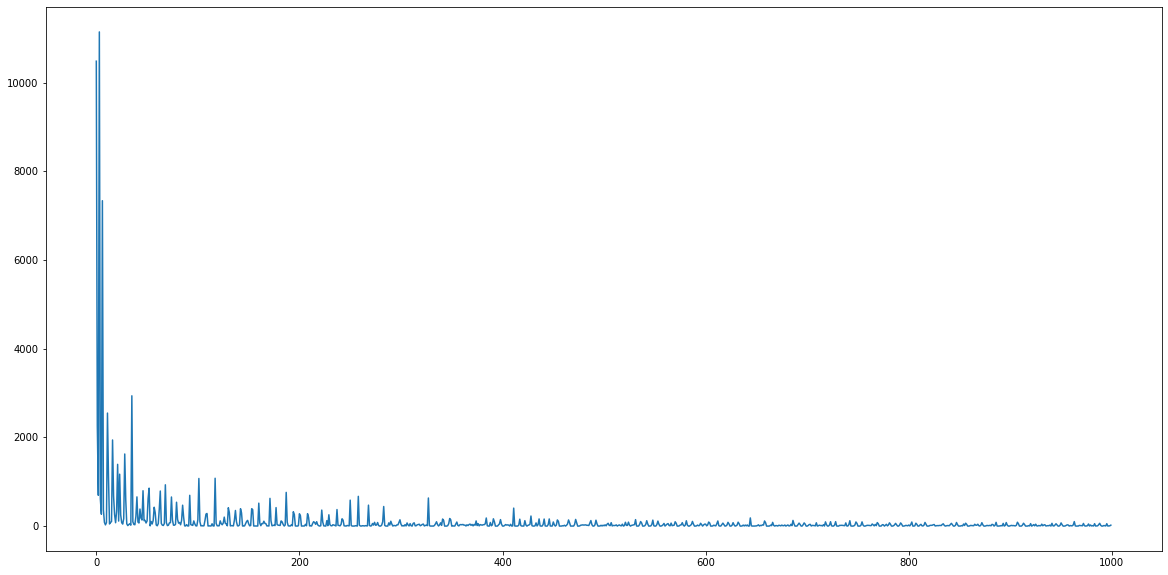

    model_path=/sharehouse/DATA/SMART_FACTORY/ckim/model/mlp-data_up_delta2.model is saved


<Figure size 432x288 with 0 Axes>

In [30]:
training(model, train_loader)

In [31]:
model.eval()

Sequential(
  (0): Linear(in_features=6, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=1024, bias=True)
  (5): ReLU()
  (6): Linear(in_features=1024, out_features=2048, bias=True)
  (7): ReLU()
  (8): Linear(in_features=2048, out_features=512, bias=True)
  (9): ReLU()
  (10): Linear(in_features=512, out_features=32, bias=True)
  (11): ReLU()
  (12): Linear(in_features=32, out_features=1, bias=True)
)

In [32]:
model.load_state_dict(torch.load(model_name))

<All keys matched successfully>

In [33]:
testing(model, test_loader, 10.)
testing(model, test_loader, 30.)


Testing is Started 
model is loaded
3399 3399
[[94.70160675048828], [393.4920654296875], [666.4263305664062], [125.72068786621094], [430.3970642089844], [126.55685424804688], [152.4523468017578], [81.78064727783203], [107.40998840332031], [300.79736328125]]
[[95.0], [394.0], [667.0], [126.0], [431.0], [127.0], [153.0], [71.0], [108.0], [301.0]]
평균제곱근오차 1.7638961294946214
결정계수 0.9999719933166068
hit ratio with error range(10.00) = 0.9947, no of errors = 18, total = 3399

Testing is Started 
model is loaded
3399 3399
[[94.70160675048828], [393.4920654296875], [666.4263305664062], [125.72068786621094], [430.3970642089844], [126.55685424804688], [152.4523468017578], [81.78064727783203], [107.40998840332031], [300.79736328125]]
[[95.0], [394.0], [667.0], [126.0], [431.0], [127.0], [153.0], [71.0], [108.0], [301.0]]
평균제곱근오차 1.7638961294946214
결정계수 0.9999719933166068
hit ratio with error range(30.00) = 0.9994, no of errors = 2, total = 3399


In [35]:
testing2(model, test_loader, X2_mean, X3_mean, X4_mean, X1_d1_mean, X3_d1_mean, 10.)
testing2(model, test_loader, X2_mean, X3_mean, X4_mean, X1_d1_mean, X3_d1_mean, 30.)


Testing is Started 
model is loaded
3399 3399
평균제곱근오차 298.30238609041174
결정계수 -8.57272824591843
hit ratio with error range(10.00) = 0.0412, no of errors = 3259, total = 3399

Testing is Started 
model is loaded
3399 3399
평균제곱근오차 298.30238609041174
결정계수 -8.57272824591843
hit ratio with error range(30.00) = 0.1247, no of errors = 2975, total = 3399


In [174]:
testing3(model, test_loader, X2_mean, x3_push, X4_mean, X1_d1_mean, X3_d1_mean, 10.)
testing3(model, test_loader, X2_mean, x3_push, X4_mean, X1_d1_mean, X3_d1_mean, 30.)


Testing is Started 
model is loaded
3399 3399
평균제곱근오차 373.9440728281412
결정계수 -1.3449536841721037
hit ratio with error range(10.00) = 0.1421, no of errors = 2916, total = 3399

Testing is Started 
model is loaded
3399 3399
평균제곱근오차 373.9440728281412
결정계수 -1.3449536841721037
hit ratio with error range(30.00) = 0.3304, no of errors = 2276, total = 3399


In [37]:
ran = [200, 400, 600, 800, 1000]
for i in ran:
    print(i, x_test[i], y_test[i])
    print(i-1, x_test[i-1], y_test[i-1])
    print('    mean = ', x_test[i-5:i].mean(axis=0))
print()


200 [118.   5. 143.  10. 118. 143.] 276.0
199 [215.   5. 143.  10. 215. 143.] 373.0
    mean =  [ 93.    5.  221.8  10.  120.8  70.6]
400 [ 61.   5.  36.  10. 136.  18.] 112.0
399 [134.   5.  50.  10. 195.   4.] 199.0
    mean =  [131.8   5.  181.   10.  150.   52.8]
600 [215.   5. 143.  10. 170.   2.] 373.0
599 [ 55.   5.   5.  10. 292. 169.] 75.0
    mean =  [113.4   5.   73.2  10.  183.8  58.2]
800 [303.   5.  15.  10.  43.  53.] 333.0
799 [184.   5. 195.  10. 184. 195.] 394.0
    mean =  [127.2   5.  235.4  10.  145.6 348.4]
1000 [136.   5.  68.  10. 139. 232.] 219.0
999 [74.  5. 21. 10. 18. 56.] 110.0
    mean =  [110.    5.   33.6  10.  102.4  43.6]



Sample test

In [ ]:
X1_val = 169.
X2_val = 5.
X3_val = 13.
X4_val = 10.
Y0_val = 197.
X1_d1_val = 101.
X3_d1_val = 93.
print('X1={:.2f}, X2={:.2f}, X3={:.2f}, X4={:.2f}, Y0={:.2f}'.format(X1_val, X2_val, X3_val,X4_val,Y0_val))
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X1, X2, X3, X4 are known value, ', predict_val[0])
X2_val = X2_mean
X3_val = X3_mean
X4_val = X4_mean
X1_d1_val = X1_d1_mean
X3_d1_val = X3_d1_mean
X1_d2_val = X1_d2_mean
X3_d2_val = X3_d2_mean
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val, X1_d2_val, X3_d2_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])
X2_val = 5
X3_val = 18
X4_val = 10
X1_d1_val = 89
X3_d1_val = 18
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

In [39]:
X1_val = 29.
X2_val = 5.
X3_val = 28.
X4_val = 10.
Y0_val = 72.
X1_d1_val = 154.
X1_d2_val = 29.
X3_d1_val = 12.
X3_d2_val = 28.
print('X1={:.2f}, X2={:.2f}, X3={:.2f}, X4={:.2f}, Y0={:.2f}'.format(X1_val, X2_val, X3_val,X4_val,Y0_val))
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X1, X2, X3, X4 are known value, ', predict_val[0])
X2_val = X2_mean
X3_val = X3_mean
X4_val = X4_mean
X1_d1_val = X1_d1_mean
X3_d1_val = X3_d1_mean
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X2_val = 5.
X3_val = 375.
X4_val = 10.
X1_d1_val = 48.
X3_d1_val = 57
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X1=29.00, X2=5.00, X3=28.00, X4=10.00, Y0=72.00


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x6 and 4x64)

In [40]:
X1_val = 117.
X2_val = 5.
X3_val = 126.
X4_val = 10.
Y0_val = 258.
X1_d1_val = 76.
X3_d1_val = 17.
print('X1={:.2f}, X2={:.2f}, X3={:.2f}, X4={:.2f}, Y0={:.2f}'.format(X1_val, X2_val, X3_val,X4_val,Y0_val))
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X1, X2, X3, X4 are known value, ', predict_val[0])
X2_val = X2_mean
X3_val = X3_mean
X4_val = X4_mean
X1_d1_val = X1_d1_mean
X3_d1_val = X3_d1_mean
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X2_val = 5.
X3_val = 105.
X4_val = 10.
X1_d1_val = 122.
X1_d2_val = 66.
X3_d1_val = 85.
X3_d2_val = 9.
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X1=117.00, X2=5.00, X3=126.00, X4=10.00, Y0=258.00


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x6 and 4x64)

In [41]:
X1_val = 95.
X2_val = 5.
X3_val = 6.
X4_val = 10.
Y0_val = 116.
X1_d1_val = 175.
X3_d1_val = 11.
print('X1={:.2f}, X2={:.2f}, X3={:.2f}, X4={:.2f}, Y0={:.2f}'.format(X1_val, X2_val, X3_val, X4_val,Y0_val))
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X1, X2, X3, X4 are known value, ', predict_val[0])
X2_val = X2_mean
X3_val = X3_mean
X4_val = X4_mean
X1_d1_val = X1_d1_mean
X3_d1_val = X3_d1_mean
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X2_val = 5.
X3_val = 17.
X4_val = 10.
X1_d1_val = 167.
X3_d1_val = 17.
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X1=95.00, X2=5.00, X3=6.00, X4=10.00, Y0=116.00


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x6 and 4x64)

In [42]:
X1_val = 152.
X2_val = 5.
X3_val = 55.
X4_val = 10.
Y0_val = 222.
X1_d1_val = 282.
X3_d1_val = 259.
print('X1={:.2f}, X2={:.2f}, X3={:.2f}, X4={:.2f}, Y0={:.2f}'.format(X1_val, X2_val, X3_val,X4_val,Y0_val))
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X1, X2, X3, X4 are known value, ', predict_val[0])
X2_val = X2_mean
X3_val = X3_mean
X4_val = X4_mean
X1_d1_val = X1_d1_mean
X3_d1_val = X3_d1_mean
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X2_val = 5.
X3_val = 55.
X4_val = 10.
X1_d1_val = 382.
X3_d1_val = 359.
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X1=152.00, X2=5.00, X3=55.00, X4=10.00, Y0=222.00


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x6 and 4x64)